<a href="https://colab.research.google.com/github/Akif4362/bangla_sentiment_analysis/blob/main/bangla_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [486]:
# we import the necessary libraries
import torch
import torch.nn as nn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

device = "cuda" if torch.cuda.is_available() else "cpu"

In [487]:
# we get the train, val and test data
!wget https://github.com/banglanlp/bangla-sentiment-classification/raw/main/data/multichannel_bsentiment/multichannel_bsentiment_train.tsv

df_train = pd.read_csv('/content/multichannel_bsentiment_train.tsv',sep='\t')
df_train.head()

--2024-10-05 06:27:18--  https://github.com/banglanlp/bangla-sentiment-classification/raw/main/data/multichannel_bsentiment/multichannel_bsentiment_train.tsv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/banglanlp/bangla-sentiment-classification/main/data/multichannel_bsentiment/multichannel_bsentiment_train.tsv [following]
--2024-10-05 06:27:18--  https://raw.githubusercontent.com/banglanlp/bangla-sentiment-classification/main/data/multichannel_bsentiment/multichannel_bsentiment_train.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1245386 (1.2M) [text/plain]
Saving to: ‘multichannel_

,id,text,class_label
0,473,আল্লাহ অবশ্যই এদের পাশে থাকবে।,Positive
1,1954,বেগম খালেদা জিয়া সঠিক বলেছেন।,Positive
2,2145,ভারতীয় অনূর্ধ্ব-১৯ দলের কোচ ম্যাচ শেষে পাকিস্...,Positive
3,2250,খুব গুরুত্ব পূর্ন একটি ভাল সিদ্ধান্ত রাজ্জাক ভ...,Positive
4,4680,এই বাভে যদি সফর করা যেত মানুষ আর লক্ষ লক্ক টা...,Negative


In [488]:
!wget https://github.com/banglanlp/bangla-sentiment-classification/raw/main/data/multichannel_bsentiment/multichannel_bsentiment_test.tsv

df_test = pd.read_csv('/content/multichannel_bsentiment_test.tsv',sep='\t')
df_test.head()

--2024-10-05 06:27:18--  https://github.com/banglanlp/bangla-sentiment-classification/raw/main/data/multichannel_bsentiment/multichannel_bsentiment_test.tsv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/banglanlp/bangla-sentiment-classification/main/data/multichannel_bsentiment/multichannel_bsentiment_test.tsv [following]
--2024-10-05 06:27:19--  https://raw.githubusercontent.com/banglanlp/bangla-sentiment-classification/main/data/multichannel_bsentiment/multichannel_bsentiment_test.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 318041 (311K) [text/plain]
Saving to: ‘multichannel_bsen

,id,text,class_label
0,1,"এমন কোনও রেস্টুরেন্ট হবে না যা আমি ফিরে আসব,যদ...",Positive
1,2,"এমন কোনও রেস্টুরেন্ট হবে না যা আমি ফিরে আসব,যদ...",Positive
2,3,"একটি সন্দেহ ছাড়া Orsay, NYC মধ্যে খাঁটি ফরাসি...",Positive
3,4,কর্মচারী কোন অর্থহীনতা হয়।,Positive
4,5,চীনা ডেজার্টগুলি পরিচিত মিষ্টি ছাড়াও স্বাস্থ্...,Positive


In [489]:
!wget https://github.com/banglanlp/bangla-sentiment-classification/raw/main/data/multichannel_bsentiment/multichannel_bsentiment_dev.tsv
df_val = pd.read_csv('/content/multichannel_bsentiment_dev.tsv',sep='\t')
df_val.head()

--2024-10-05 06:27:19--  https://github.com/banglanlp/bangla-sentiment-classification/raw/main/data/multichannel_bsentiment/multichannel_bsentiment_dev.tsv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/banglanlp/bangla-sentiment-classification/main/data/multichannel_bsentiment/multichannel_bsentiment_dev.tsv [following]
--2024-10-05 06:27:19--  https://raw.githubusercontent.com/banglanlp/bangla-sentiment-classification/main/data/multichannel_bsentiment/multichannel_bsentiment_dev.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308298 (301K) [text/plain]
Saving to: ‘multichannel_bsentim

,id,text,class_label
0,4,রাজশাহী শিরইলে অনেক রকমের পাখি আসে আমি দেখছি ...,Positive
1,5,তাদের কত সম্মান করি আমরা,Positive
2,6,ইন্নালিল্লাহে ওয়া ইন্নাইলাহি রাজিউন। আল্লাহ উ...,Positive
3,12,ধন্যবাদ। হাজাও হারলে সমসা নাই। আরে হারে আমি আ...,Positive
4,20,আমার মত প্রবাসীদে কাছ থেকে কমিশন নিয়ে একটা বিল...,Positive


In [490]:
# the training data is too small for our purposes so we make new training and testing sets
df = pd.concat([df_train, df_val, df_test]).reset_index(drop=True)
df = df.drop(['id'], axis=1)
df.head()

,text,class_label
0,আল্লাহ অবশ্যই এদের পাশে থাকবে।,Positive
1,বেগম খালেদা জিয়া সঠিক বলেছেন।,Positive
2,ভারতীয় অনূর্ধ্ব-১৯ দলের কোচ ম্যাচ শেষে পাকিস্...,Positive
3,খুব গুরুত্ব পূর্ন একটি ভাল সিদ্ধান্ত রাজ্জাক ভ...,Positive
4,এই বাভে যদি সফর করা যেত মানুষ আর লক্ষ লক্ক টা...,Negative


In [491]:
df_train, df_test = train_test_split(df, test_size=0.30)

In [492]:
len(df_train), len(df_test)

(5894, 2526)

In [493]:
# we hot encode the class names
df_train['b_labels'] = df_train['class_label'].map({'Positive' : 0, 'Negative' : 1})
df_test['b_labels'] = df_test['class_label'].map({'Positive' : 0, 'Negative' : 1})

In [494]:
df_train.head()

,text,class_label,b_labels
5806,ভয নাই মেডম ।আল্লা আমাদের সাথে আছে।,Positive,0
7775,"৪ওভারে ৮০রান,আর ব্যাটিং এ নেমে ৩ওভার খেয়ে ডাগ ...",Negative,1
3442,মাশাআল্লাহ অপরাধী তো খুব খুশি ফুলের মালায় বরন...,Positive,0
5725,দোয়া করি আর ভাল করেন আমারা আছি আপনাদের সাথে,Positive,0
3928,জ্বী রূপকথা মনে হবে অাপনাদের ।,Negative,1


In [495]:
# we create a vocab with padding initiated
idx = 1
word2idx = {"<pad>" : 0}

In [496]:
for i, row in df_train.iterrows():
  print(i)
  print(row)
  break

5806
text            ভয নাই মেডম ।আল্লা আমাদের সাথে আছে। 
class_label                                 Positive
b_labels                                           0
Name: 5806, dtype: object


In [497]:
# we create a simple split tokenization
for i, row in df_train.iterrows():
  tokens = row['text'].split()
  for token in tokens:
    if token not in word2idx:
      word2idx[token] = idx
      idx += 1

In [498]:
word2idx

{'<pad>': 0,
 'ভয': 1,
 'নাই': 2,
 'মেডম': 3,
 '।আল্লা': 4,
 'আমাদের': 5,
 'সাথে': 6,
 'আছে।': 7,
 '৪ওভারে': 8,
 '৮০রান,আর': 9,
 'ব্যাটিং': 10,
 'এ': 11,
 'নেমে': 12,
 '৩ওভার': 13,
 'খেয়ে': 14,
 'ডাগ': 15,
 'মেরে': 16,
 'বিশ্ব': 17,
 'রেকর্ড': 18,
 'করবেন': 19,
 'বচ': 20,
 'মাশরাফি': 21,
 'মাশাআল্লাহ': 22,
 'অপরাধী': 23,
 'তো': 24,
 'খুব': 25,
 'খুশি': 26,
 'ফুলের': 27,
 'মালায়': 28,
 'বরন': 29,
 'করেন': 30,
 '।': 31,
 'দোয়া': 32,
 'করি': 33,
 'আর': 34,
 'ভাল': 35,
 'আমারা': 36,
 'আছি': 37,
 'আপনাদের': 38,
 'জ্বী': 39,
 'রূপকথা': 40,
 'মনে': 41,
 'হবে': 42,
 'অাপনাদের': 43,
 'আমরা': 44,
 'শনিবার': 45,
 'রাতের': 46,
 'বিকল্পের': 47,
 'অর্ধ-মূল্যের': 48,
 'সমর্থক': 49,
 'ছিলাম,': 50,
 'যখন': 51,
 'সাম্প্রতিক': 52,
 'এক': 53,
 'সাক্ষাৎকারে': 54,
 'কিছু': 55,
 'অদ্ভুত': 56,
 'স্কুইজ': 57,
 'ছিল।': 58,
 'আবারো': 59,
 'হিটলারকে': 60,
 'স্মরণ': 61,
 'করতে': 62,
 'চাই।আর': 63,
 'এটা': 64,
 'তখনি': 65,
 'সম্ভব': 66,
 'হিটলারের': 67,
 'প্রেতাত্মা': 68,
 'ট্রাম্প': 69,
 'নারকীয়': 70,
 'কাজ': 71,

In [499]:
len(word2idx)

18674

In [500]:
# we convert our documents into vectors of vocab
train_sentences_as_int = []
for i, row in df_train.iterrows():
  tokens = row['text'].split()
  sentence_as_int = [word2idx[token] for token in tokens]
  train_sentences_as_int.append(sentence_as_int)

In [501]:
test_sentences_as_int = []
for i, row in df_test.iterrows():
  tokens = row['text'].split()
  sentence_as_int = [word2idx[token] for token in tokens if token in word2idx]
  test_sentences_as_int.append(sentence_as_int)

In [502]:
len(train_sentences_as_int), len(test_sentences_as_int)

(5894, 2526)

In [503]:
# we create a batches of data with equal sequence lengths by padding
def data_generator(X, y, batch_size=32):
  X, y = shuffle(X, y)
  n_batches = int(np.ceil(len(y) / batch_size))
  for i  in range(n_batches):
    end = min((i + 1) * batch_size, len(y))

    X_batch = X[i * batch_size:end]
    y_batch = y[i * batch_size:end]

    max_len = np.max([len(x) for x in X_batch])
    for j in range(len(X_batch)):
      x = X_batch[j]
      pad = [0] * (max_len - len(x))
      X_batch[j] = pad + x

    X_batch = torch.from_numpy(np.array(X_batch)).long()
    y_batch = torch.from_numpy(np.array(y_batch)).long()

    yield X_batch, y_batch

In [504]:
for inputs, targets in data_generator(train_sentences_as_int, df_train.b_labels):
  print("inputs", inputs, "shpae:", inputs.shape)
  print("targets", targets, "shape:", targets.shape)
  break

inputs tensor([[   0,    0,    0,  ...,    0,  581, 5010],
        [   0,    0,    0,  ...,  149, 7602,  171],
        [   0,    0,    0,  ...,  236,  470, 2469],
        ...,
        [   0,    0,    0,  ..., 1485,  584, 1486],
        [   0,    0,    0,  ..., 3676, 1061,   31],
        [   0,    0,    0,  ..., 9664, 9588, 7865]]) shpae: torch.Size([32, 62])
targets tensor([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 0, 0, 0]) shape: torch.Size([32])


In [505]:
for inputs, targets in data_generator(test_sentences_as_int, df_test.b_labels):
  print("inputs", inputs, "shpae:", inputs.shape)
  print("targets", targets, "shape:", targets.shape)
  break

inputs tensor([[    0,     0,     0,  ...,  7040,  5342,   197],
        [    0,     0,     0,  ...,   348,   177, 13141],
        [    0,     0,     0,  ...,  3953,  5140,   171],
        ...,
        [    0,     0,     0,  ...,   493,    10, 16707],
        [    0,     0,     0,  ...,   126,  2157,    42],
        [    0,     0,     0,  ...,     0,     0,  1017]]) shpae: torch.Size([32, 41])
targets tensor([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 1, 0, 1, 0, 1]) shape: torch.Size([32])


In [506]:
# we build and initiate our model
class LSTM(nn.Module):
  def __init__(self, vocab_size, embed_dim, hidden_size, num_stacked_layers, outputs):
    super().__init__()
    self.hidden_size = hidden_size
    self.num_stacked_layers = num_stacked_layers
    self.vocab_size = vocab_size
    self.embed_dim = embed_dim

    self.embed_layer = nn.Embedding(self.vocab_size, self.embed_dim)
    self.lstm = nn.LSTM(embed_dim, hidden_size, num_stacked_layers, batch_first=True, dropout=0.5)
    self.fc = nn.Linear(hidden_size, outputs)

  def forward(self, x):
    batch_size = x.size(0)
    h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
    c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

    out = self.embed_layer(x)

    out, _ = self.lstm(out, (h0, c0))

    out, _ = torch.max(out, 1)

    out = self.fc(out)
    return out

model = LSTM(len(word2idx), embed_dim=64, hidden_size=128, num_stacked_layers=2, outputs=1).to(device)
model

LSTM(
  (embed_layer): Embedding(18674, 64)
  (lstm): LSTM(64, 128, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)

In [507]:
# we initiate loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [508]:
train_gen = lambda: data_generator(train_sentences_as_int, df_train.b_labels)
test_gen = lambda: data_generator(test_sentences_as_int, df_test.b_labels)

In [509]:
# we create training function for batch gradient descent
def batch_gd(model, loss_fn, optimizer, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):

    train_loss = []
    for inputs, targets in train_gen():
      targets = targets.view(-1, 1).float()

      inputs, targets = inputs.to(device), targets.to(device)

      optimizer.zero_grad()

      outputs = model(inputs)
      loss = loss_fn(outputs, targets)

      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    train_loss = np.mean(train_loss)

    test_loss = []
    for inputs, targets in test_gen():
      inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.view(-1, 1).float()
      outputs = model(inputs)
      loss = loss_fn(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    train_losses[it] = train_loss
    test_losses[it] = test_loss

    print(f"epoch {it+1}/{epochs}, train loss: {train_loss:.4f}, \
    test loss: {test_loss:.4f}")


  return train_losses, test_losses

In [510]:
train_losses, test_losses = batch_gd(model, loss_fn, optimizer, 20)

epoch 1/20, train loss: 0.6895,     test loss: 0.6865
epoch 2/20, train loss: 0.6860,     test loss: 0.6815
epoch 3/20, train loss: 0.6652,     test loss: 0.6509
epoch 4/20, train loss: 0.6292,     test loss: 0.6234
epoch 5/20, train loss: 0.6024,     test loss: 0.6030
epoch 6/20, train loss: 0.5723,     test loss: 0.5897
epoch 7/20, train loss: 0.5530,     test loss: 0.5806
epoch 8/20, train loss: 0.5354,     test loss: 0.5728
epoch 9/20, train loss: 0.5212,     test loss: 0.5653
epoch 10/20, train loss: 0.5035,     test loss: 0.5658
epoch 11/20, train loss: 0.4884,     test loss: 0.5524
epoch 12/20, train loss: 0.4702,     test loss: 0.5525
epoch 13/20, train loss: 0.4491,     test loss: 0.5436
epoch 14/20, train loss: 0.4324,     test loss: 0.5419
epoch 15/20, train loss: 0.4102,     test loss: 0.5638
epoch 16/20, train loss: 0.3902,     test loss: 0.5539
epoch 17/20, train loss: 0.3705,     test loss: 0.5483
epoch 18/20, train loss: 0.3473,     test loss: 0.5522
epoch 19/20, train 

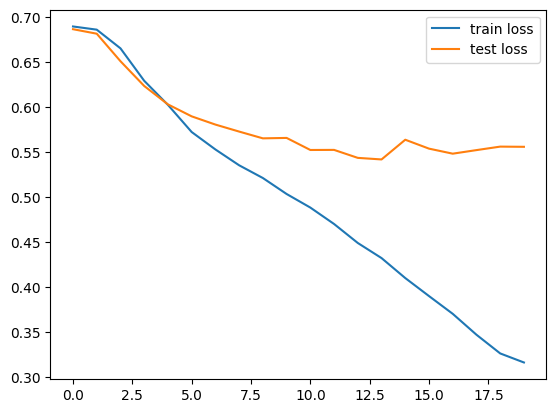

In [511]:
# plot the loss curves
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

In [512]:
# we find the accuracy of our predictions
n_correct = 0.
n_total = 0.
for inputs, targets in train_gen():
  targets = targets.view(-1, 1).float()
  inputs, targets = inputs.to(device), targets.to(device)

  outputs = model(inputs)
  predictions = (outputs > 0)
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_gen():
  targets = targets.view(-1, 1).float()
  inputs, targets = inputs.to(device), targets.to(device)

  outputs = model(inputs)
  predictions = (outputs > 0)
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"train acc: {train_acc:.4f}, test acc: {test_acc:.4f}")

train acc: 0.8880, test acc: 0.7435
